# Unbinned log likelihood fitting with nllfitter


This is an example of estimating model parameters of a probability distribution function by minimizing the negative log likelihood (nll).  This will be carried out on dataset that was generated to simulate the discovery of the Higgs boson in the diphoton decay channel.  This can all be run via the script (test/hgg_fit.py).  Let's first import all the necessary modules:

In [2]:
%matplotlib inline
%cd '/home/naodell/work/projects/nllfit'

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.stats import norm

from lmfit import Parameters
from nllfit import NLLFitter, Model

/home/naodell/work/projects/nllfit


In [3]:
xlimits = (100., 180.)
df      = pd.read_pickle('data/BH_paper_data.p')
data    = df['ST_mul8_BB'].values
n_total = data.size

Define the background pdf and background plus signal datasets.

In [4]:
def pdf(x, a):
    '''
    Wrapper for exponential function. 
    
    Parameters:
    ===========
    x: data
    a: model parameters 
    '''
    return  (1./a[1])*np.exp(-(x - a[0])/a[1])

For the background model (null hypothesis) we will use a third order Legendre polynomial normalized to unity (this is satisfied by requiring the coefficient for the constand term be 0.5).  The background plus signal model (alternative model) will include an additional Gaussian term.  The mean of the Gaussian should correspond to the Higgs boson mass.

Let's set up the background only fit,

In [13]:
params = Parameters()
params.add_many(
                ('x0', 2500., False, 2500., None, None),
                ('p1', 100, True, None, None, None)
               )

model  = Model(pdf, params)
fitter = NLLFitter(model)

The NLLFitter framework uses the lmfit Parameters class.  The usage is described [here](https://lmfit.github.io/lmfit-py/parameters.html).  The Model class holds the functional form of the pdf and the parameters.  The NLLFitter is initialized with bg_model which will be used to fit to the data as follows, 

In [14]:
result = fitter.fit(data)

Fit finished with status: 0
[[Variables]]
    x0:   2500 (fixed)
    p1:   364.399813 +/- 0        (0.00%) (init= 100)

[[Correlation matrix]]
[[ nan  nan]
 [ nan  nan]] 



That's all there is to it.  (N.B. the parameters are correct for the range [-1, 1], but in general won't be for the true range.  This will be addressed in iterations in the near future).  Let's do the same for the background plus signal model,

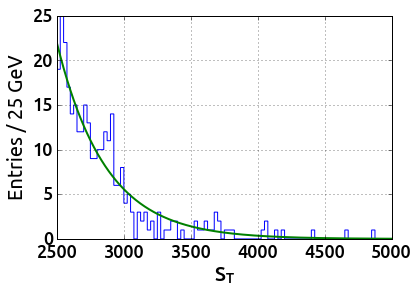

In [9]:
x = np.linspace(2500, 5000, 1000)

plt.hist(data, bins=100, range=(2500, 5000), histtype='step')
plt.plot(x, data.size*25*pdf(x, result.x))
plt.ylabel('Entries / 25 GeV')
plt.xlabel('$\sf S_{T}$')
plt.show()